# 1. Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# 2. Load Data

In [2]:
raw_data = pd.read_excel("cust_data.xlsx", index_col = 0)
raw_data.head()

,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,M,7,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
2,F,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,M,7,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,F,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,NaN,10,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


# 3. EDA
1. Data types and dimensions
2. Statistical Summary
3. Missing Value
4. Visualization
5. correlation

1. Data types and dimensions

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  27276 non-null  object
 1   Orders                  30000 non-null  int64 
 2   Jordan                  30000 non-null  int64 
 3   Gatorade                30000 non-null  int64 
 4   Samsung                 30000 non-null  int64 
 5   Asus                    30000 non-null  int64 
 6   Udis                    30000 non-null  int64 
 7   Mondelez International  30000 non-null  int64 
 8   Wrangler                30000 non-null  int64 
 9   Vans                    30000 non-null  int64 
 10  Fila                    30000 non-null  int64 
 11  Brooks                  30000 non-null  int64 
 12  H&M                     30000 non-null  int64 
 13  Dairy Queen             30000 non-null  int64 
 14  Fendi                   30000 non-null  int64 
 15  He

In [4]:
print(raw_data.shape)

(30000, 37)


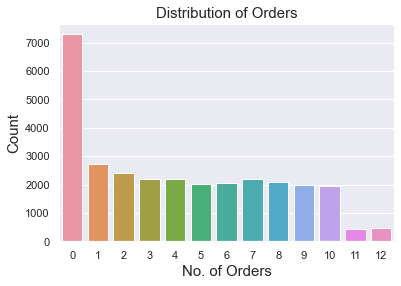

In [5]:
sns.countplot(data = raw_data, x='Orders')

plt.title("Distribution of Orders", fontsize = 15)
plt.xlabel('No. of Orders', fontsize = 15)
plt.ylabel("Count", fontsize = 15)

plt.show()

Its observed that most of the customer have no past orders

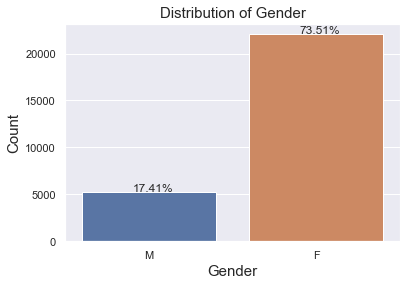

In [8]:
sns.countplot(data = raw_data, x='Gender')

plt.title("Distribution of Gender", fontsize = 15)
plt.xlabel('Gender', fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.text(x = -0.1, y = raw_data.Gender.value_counts()[1] + 20, 
         s = str(round((raw_data.Gender.value_counts()[1])*100/len(raw_data.Gender),2)) + '%')
plt.text(x = 0.9, y = raw_data.Gender.value_counts()[0] + 20, 
         s = str(round((raw_data.Gender.value_counts()[0])*100/len(raw_data.Gender),2)) + '%')

plt.show()

There are more female customer 

2. Statistical Summary

In [9]:
raw_data.describe()

,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,4.169800,0.267433,0.252333,0.222933,0.161333,0.143533,0.139767,0.106933,0.111433,0.094267,...,0.102533,0.271133,0.370067,0.158967,0.077667,0.057333,0.192200,0.116367,0.088033,0.070900
std,3.590311,0.804778,0.705368,0.917494,0.740038,0.641258,0.525840,0.515921,0.547990,0.531592,...,0.486376,0.714682,0.758465,0.510527,0.383370,0.300082,0.641306,0.446578,0.399277,0.387915
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,12.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,16.000000,15.000000,...,19.000000,12.000000,11.000000,8.000000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


Minimum of 4 orders and maximum of 12 orders
75% of the data are observed to be 0

In [10]:
raw_data.describe(include = object)

,Gender
count,27276
unique,2
top,F
freq,22054


Variable Gender is F which has 22054 observations

In [11]:
total=raw_data.isnull().sum().sort_values(ascending = False)
percent = (raw_data.isnull().sum()/raw_data.isnull().sum().sort_values(ascending = False))


missing_data = pd.concat([total, percent], axis = 1, keys = ['total', 'percent'])
missing_data

,total,percent
Gender,2724,1.0
J.M. Smucker,0,NaN
Juniper,0,NaN
Huawei,0,NaN
Compaq,0,NaN
IBM,0,NaN
Burberry,0,NaN
Mi,0,NaN
LG,0,NaN
Dior,0,NaN


the variable 'Gender' observed missing values, plot the heatmap to visualize the missing value

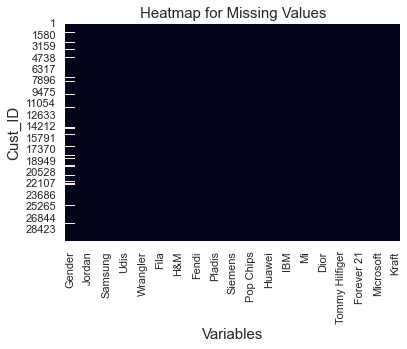

In [12]:
sns.heatmap(raw_data.isnull(), cbar= False)

plt.title("Heatmap for Missing Values", fontsize = 15)
plt.xlabel('Variables', fontsize = 15)
plt.ylabel("Cust_ID", fontsize = 15)

plt.show()

Missing Values:

Drop the row/ Column
Replace with mean/ frequency / other function

=> 'Gender' is a catergorical variable, include dummy

In [15]:
data = pd.get_dummies(raw_data, columns = ['Gender'])
data.head()

,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,...,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Gender_F,Gender_M
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,7,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,7,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,10,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,1,1,0,0


In [16]:
data.isnull().sum()

Orders                    0
Jordan                    0
Gatorade                  0
Samsung                   0
Asus                      0
Udis                      0
Mondelez International    0
Wrangler                  0
Vans                      0
Fila                      0
Brooks                    0
H&M                       0
Dairy Queen               0
Fendi                     0
Hewlett Packard           0
Pladis                    0
Asics                     0
Siemens                   0
J.M. Smucker              0
Pop Chips                 0
Juniper                   0
Huawei                    0
Compaq                    0
IBM                       0
Burberry                  0
Mi                        0
LG                        0
Dior                      0
Scabal                    0
Tommy Hilfiger            0
Hollister                 0
Forever 21                0
Colavita                  0
Microsoft                 0
Jiffy mix                 0
Kraft               

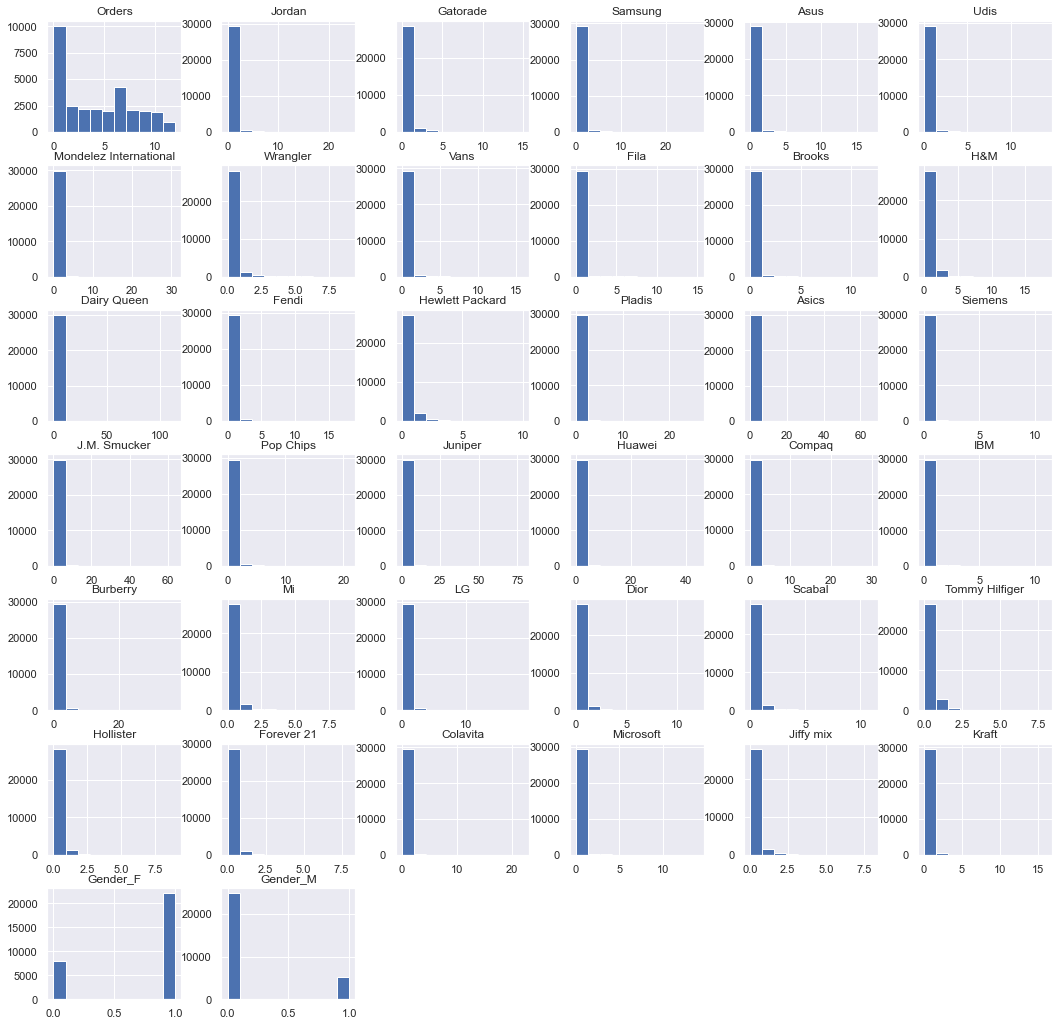

In [17]:
fig = data.hist(figsize = (18,18))

# 4. K-Means cluster
1. Prepare the Data
2. Build multiple K clust

Centroid- based Clustering Algo

1. Prepare the Data

the column of 'Orders', 'Gender_F', 'Gender_M' has to be dropped for scaling the remining variables

In [18]:
features = data.drop(['Orders', 'Gender_F', 'Gender_M'], axis = 1)

features.head()

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [19]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler().fit(features)

features = scale.transform(features)


In [21]:
features_scaled = pd.DataFrame(features, columns = data.columns[1:36])

features_scaled.head()

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,-0.332312,-0.357739,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,3.446412,-0.177332,-0.297352,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
1,-0.332312,1.059984,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,1.019864,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
2,-0.332312,1.059984,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,1.978708,-0.220486,-0.182775
3,-0.332312,-0.357739,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
4,-0.332312,-0.357739,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,-0.379382,2.149024,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,2.284083,2.395151


2. Build multiple K  : 
using silhouette score method let we build our model

In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

n_clusters = [4, 5, 6, 7, 8]
for K in n_clusters:
    cluster=KMeans(n_clusters = K, random_state = 10)
    predict = cluster.fit_predict(features_scaled)
    
    score = silhouette_score(features_scaled, predict, random_state = 10)
    print("For n_cluster = {}, silhouette score is {}".format(K, score))




For n_cluster = 4, silhouette score is 0.28882936660509695
For n_cluster = 5, silhouette score is 0.2734507732644251
For n_cluster = 6, silhouette score is 0.21945733520583072
For n_cluster = 7, silhouette score is 0.2038118827349176
For n_cluster = 8, silhouette score is 0.19969011593383135


K= 4, the Silhouette score is highest. Thus we build the cluster with K = 4

In [24]:
model = KMeans(n_clusters = 4, random_state = 10)

model.fit(features_scaled)

KMeans(n_clusters=4, random_state=10)

# 5. Retrieve Cluster

we are going to build 4 cluster, identify the customer to which cluster they belong

In [25]:
data_output = data.copy(deep = True)
data_output['Cluster'] = model.labels_

data_output.head()

,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,...,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Gender_F,Gender_M,Cluster
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,7,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,1,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,2
3,7,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
5,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [26]:
data_output.head(20)

,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,...,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Gender_F,Gender_M,Cluster
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,7,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,1,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,2
3,7,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
5,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
7,6,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,0,2
8,9,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
9,1,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,1,0,1


check the size of each cluster

In [28]:
np.unique(model.labels_, return_counts = True)

(array([0, 1, 2, 3]), array([ 1255, 22772,  5272,   701], dtype=int64))

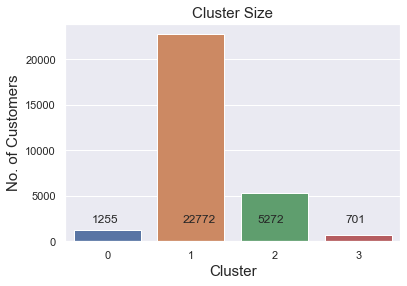

In [30]:
sns.countplot(data = data_output, x='Cluster')

plt.title("Cluster Size", fontsize=15)
plt.xlabel("Cluster", fontsize = 15)
plt.ylabel("No. of Customers", fontsize = 15)

plt.text(x=-0.18, y= 2000, s = np.unique(model.labels_, return_counts = True)[1][0])
plt.text(x=0.9, y= 2000, s = np.unique(model.labels_, return_counts = True)[1][1])
plt.text(x=1.8, y= 2000, s = np.unique(model.labels_, return_counts = True)[1][2])
plt.text(x=2.85, y= 2000, s = np.unique(model.labels_, return_counts = True)[1][3])

plt.show()

Cluster Centers: it give information about the variables belonging to the clusters

In [32]:
centers = pd.DataFrame(model.cluster_centers_, columns = data_output.columns[1:36])

centers.head()

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,0.446911,0.464653,0.233811,0.158847,0.102969,0.253960,0.317851,0.385554,0.095476,0.808415,...,1.396351,0.631866,0.290554,1.137030,0.335733,0.417016,1.391345,0.806428,1.575620,1.922702
1,-0.158476,-0.157536,-0.084381,-0.116934,-0.121153,-0.087155,-0.113422,-0.076786,-0.039016,-0.123452,...,-0.088160,-0.161581,-0.191656,-0.142253,-0.148547,-0.141765,-0.076493,-0.068999,-0.079321,-0.082740
2,0.594856,0.569990,0.324250,0.474459,0.511302,0.314878,0.430609,0.257115,0.145073,0.358618,...,0.061868,0.565501,0.770176,0.350728,0.586942,0.535840,0.003689,0.104907,-0.020615,-0.087260
3,-0.116054,0.008321,-0.110823,-0.046447,-0.085908,0.013628,-0.116023,-0.125255,0.007833,-0.127840,...,-0.099359,-0.125881,-0.074137,-0.045926,-0.180266,-0.162539,-0.032771,0.010947,-0.088290,-0.098193


# 6. Cluster Analysis
1. check the size of cluste
2. sort the variable belonging to the cluster
3. compute the statistical summary for the observation in the cluster

In [33]:
#sort the variables based on the cluster centers
cluster_1 = sorted(zip(list(centers.iloc[0,:]), list(centers.columns)), reverse = True)[:10]    

In [34]:
np.unique(model.labels_, return_counts = True)[1][0]

1255

In [35]:
cluster_1_var = pd.DataFrame(cluster_1)[1]
cluster_1_var

0            Pladis
1          Burberry
2             Kraft
3       Dairy Queen
4         Jiffy mix
5                LG
6          Colavita
7         Pop Chips
8      J.M. Smucker
9    Tommy Hilfiger
Name: 1, dtype: object

In [36]:
data_output[['Orders', 'Gender_M', 'Gender_F', 'Cluster']][data_output.Cluster==0].describe()

,Orders,Gender_M,Gender_F,Cluster
count,1255.000000,1255.000000,1255.000000,1255.0
mean,4.146614,0.120319,0.821514,0.0
std,3.630131,0.325464,0.383074,0.0
min,0.000000,0.000000,0.000000,0.0
25%,1.000000,0.000000,1.000000,0.0
50%,4.000000,0.000000,1.000000,0.0
75%,7.000000,0.000000,1.000000,0.0
max,12.000000,1.000000,1.000000,0.0


In [37]:
cluster_2 = sorted(zip(list(centers.iloc[0,:]), list(centers.columns)), reverse = True)[:10]    

In [38]:
np.unique(model.labels_, return_counts = True)[1][1]

22772

In [39]:
cluster_2_var = pd.DataFrame(cluster_2)[1]
cluster_2_var

0            Pladis
1          Burberry
2             Kraft
3       Dairy Queen
4         Jiffy mix
5                LG
6          Colavita
7         Pop Chips
8      J.M. Smucker
9    Tommy Hilfiger
Name: 1, dtype: object

In [40]:
data_output[['Orders', 'Gender_M', 'Gender_F', 'Cluster']][data_output.Cluster==1].describe()

,Orders,Gender_M,Gender_F,Cluster
count,22772.000000,22772.000000,22772.000000,22772.0
mean,4.096829,0.195547,0.705691,1.0
std,3.606516,0.396630,0.455741,0.0
min,0.000000,0.000000,0.000000,1.0
25%,0.000000,0.000000,0.000000,1.0
50%,4.000000,0.000000,1.000000,1.0
75%,7.000000,0.000000,1.000000,1.0
max,12.000000,1.000000,1.000000,1.0


In [41]:
cluster_3 = sorted(zip(list(centers.iloc[0,:]), list(centers.columns)), reverse = True)[:10]    

In [42]:
np.unique(model.labels_, return_counts = True)[1][2]

5272

In [43]:
cluster_3_var = pd.DataFrame(cluster_3)[1]
cluster_3_var

0            Pladis
1          Burberry
2             Kraft
3       Dairy Queen
4         Jiffy mix
5                LG
6          Colavita
7         Pop Chips
8      J.M. Smucker
9    Tommy Hilfiger
Name: 1, dtype: object

In [44]:
data_output[['Orders', 'Gender_M', 'Gender_F', 'Cluster']][data_output.Cluster==2].describe()

,Orders,Gender_M,Gender_F,Cluster
count,5272.000000,5272.000000,5272.000000,5272.0
mean,4.459598,0.089340,0.845220,2.0
std,3.503566,0.285261,0.361729,0.0
min,0.000000,0.000000,0.000000,2.0
25%,1.000000,0.000000,1.000000,2.0
50%,4.000000,0.000000,1.000000,2.0
75%,7.000000,0.000000,1.000000,2.0
max,12.000000,1.000000,1.000000,2.0


In [45]:
cluster_4 = sorted(zip(list(centers.iloc[0,:]), list(centers.columns)), reverse = True)[:10]    

In [46]:
np.unique(model.labels_, return_counts = True)[1][3]

701

In [47]:
cluster_4_var = pd.DataFrame(cluster_4)[1]
cluster_4_var

0            Pladis
1          Burberry
2             Kraft
3       Dairy Queen
4         Jiffy mix
5                LG
6          Colavita
7         Pop Chips
8      J.M. Smucker
9    Tommy Hilfiger
Name: 1, dtype: object

In [48]:
data_output[['Orders', 'Gender_M', 'Gender_F', 'Cluster']][data_output.Cluster==3].describe()

,Orders,Gender_M,Gender_F,Cluster
count,701.000000,701.000000,701.000000,701.0
mean,4.402282,0.209700,0.708987,3.0
std,3.522693,0.407385,0.454554,0.0
min,0.000000,0.000000,0.000000,3.0
25%,1.000000,0.000000,0.000000,3.0
50%,4.000000,0.000000,1.000000,3.0
75%,7.000000,0.000000,1.000000,3.0
max,12.000000,1.000000,1.000000,3.0


# Conclusion

1. Grocery
2. Apparels
3. Electronics
4. Basket